In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from keras.regularizers import l1, l2

In [34]:



def logistic_regression_analysis(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list)->None:
  """_summary_

  Args:
      df (_type_): _description_
  """
  
  
  
  logistic_regression = LogisticRegression()

  logistic_regression.fit(X_train, y_train)

  y_predictions = logistic_regression.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_predictions)
  
  print(classification_report(y_test,y_predictions))

  print(f"The Accuracy: {accuracy}")
  
def support_vector_machine(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:list, y_test:list):
  """_summary_

  Args:
      X_train (_type_): _description_
      X_test (_type_): _description_
      y_train (_type_): _description_
      y_test (_type_): _description_
  """
  
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  svm_pred = svm_model.predict(X_test)
  print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

In [2]:
training_df = pd.read_csv("Training.csv")

In [4]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [5]:
training_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
training_df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
455,14,175,62,30,0,33.6,0.212,38,1
456,1,135,54,0,0,26.7,0.687,62,0
457,5,86,68,28,71,30.2,0.364,24,0
458,10,148,84,48,237,37.6,1.001,51,1


In [9]:
training_df.drop_duplicates(inplace=True)

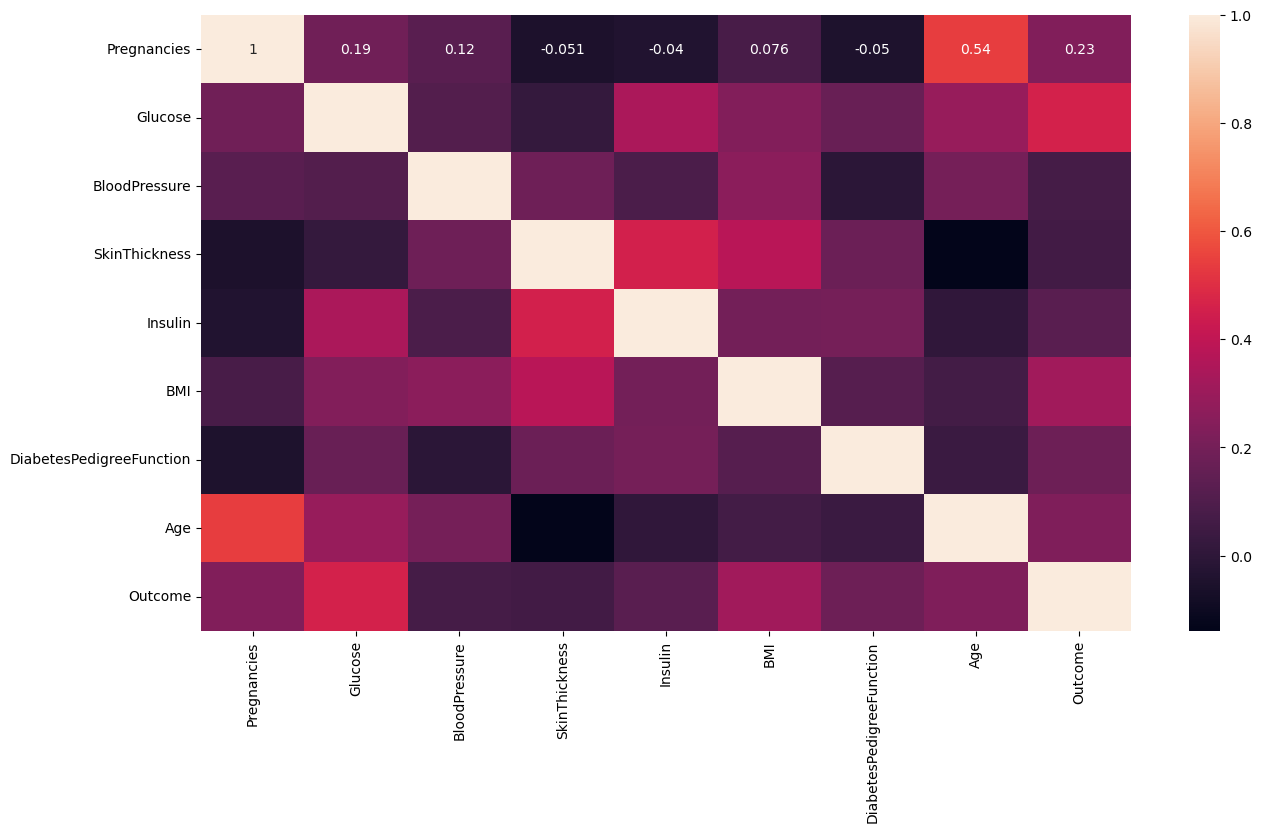

In [11]:
relations = training_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(relations, annot=True)
plt.show()

<Axes: xlabel='Age', ylabel='BMI'>

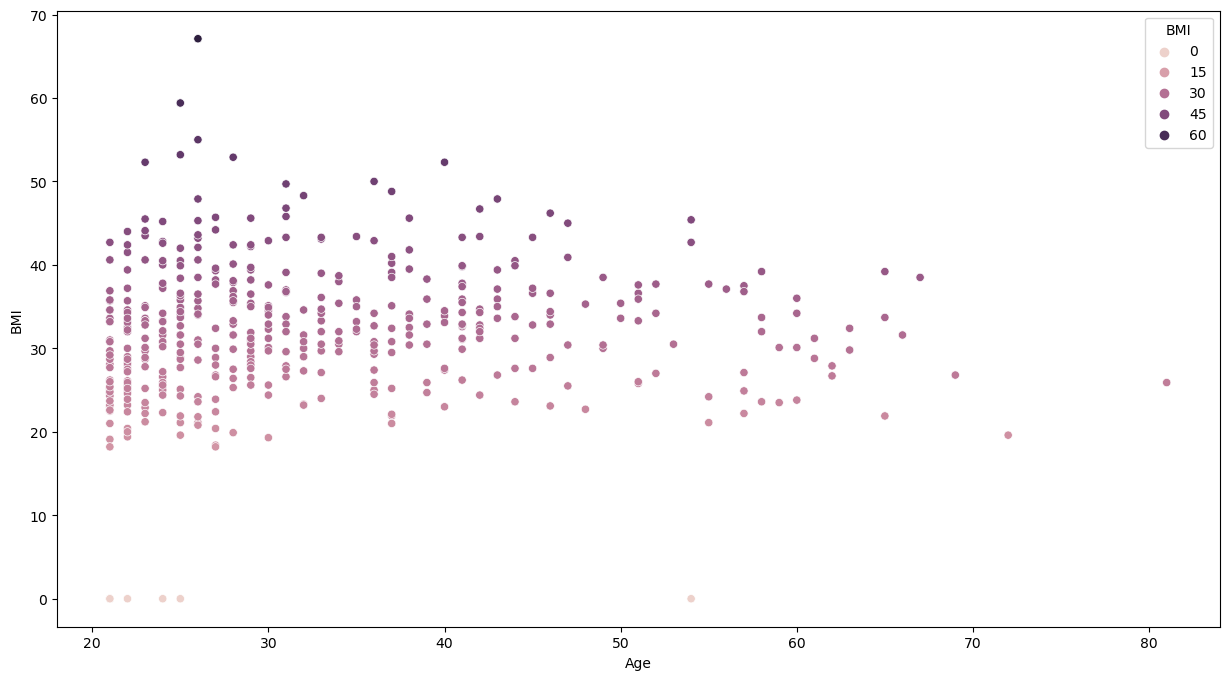

In [12]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Age", y ="BMI", data = training_df, hue ="BMI")

<Axes: xlabel='Age', ylabel='SkinThickness'>

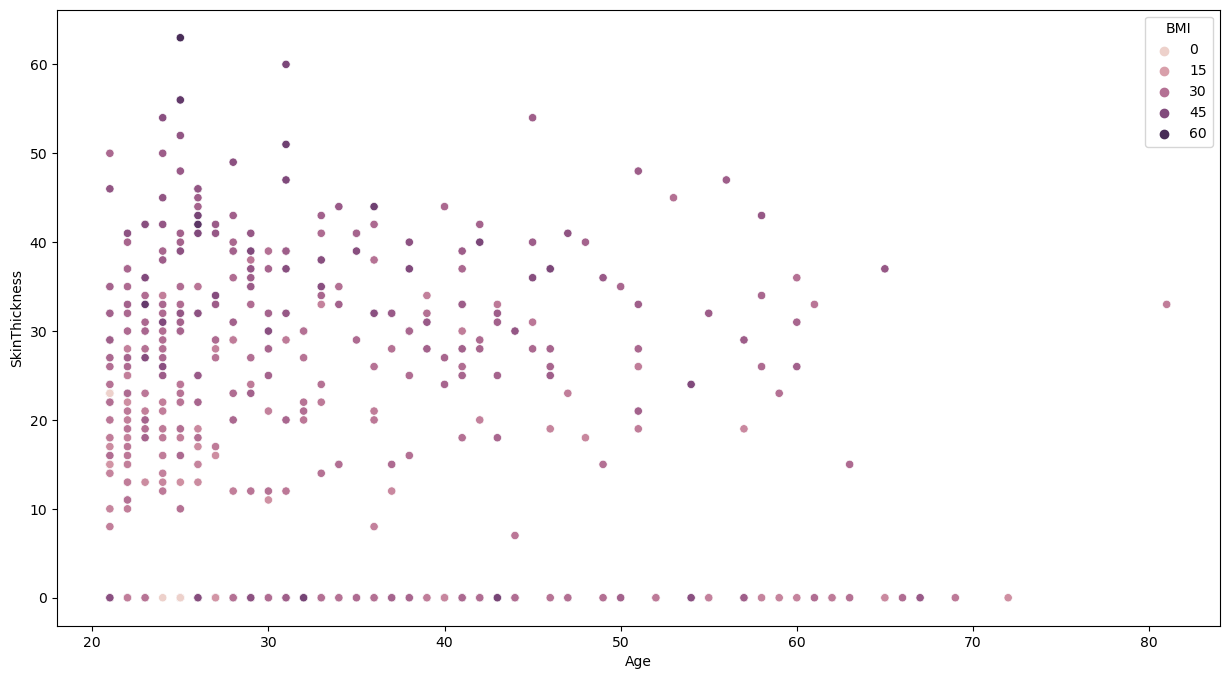

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Age", y ="SkinThickness", data = training_df, hue ="BMI")

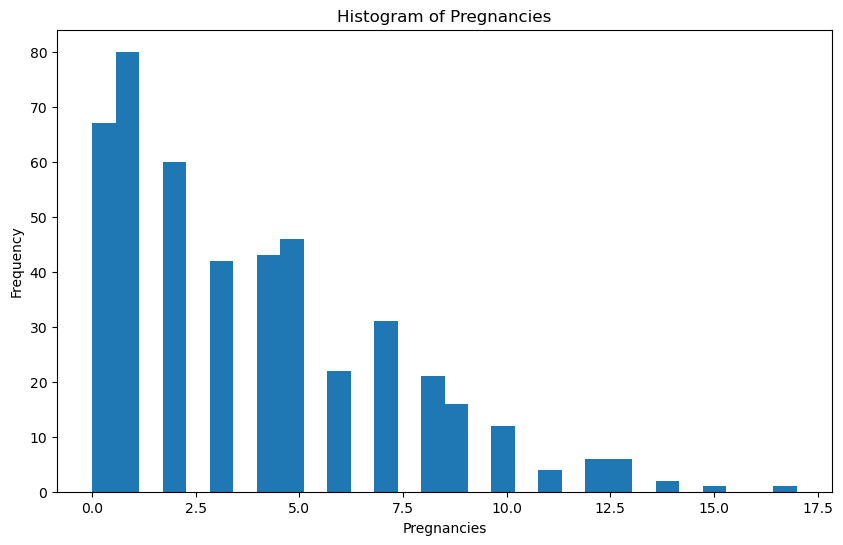

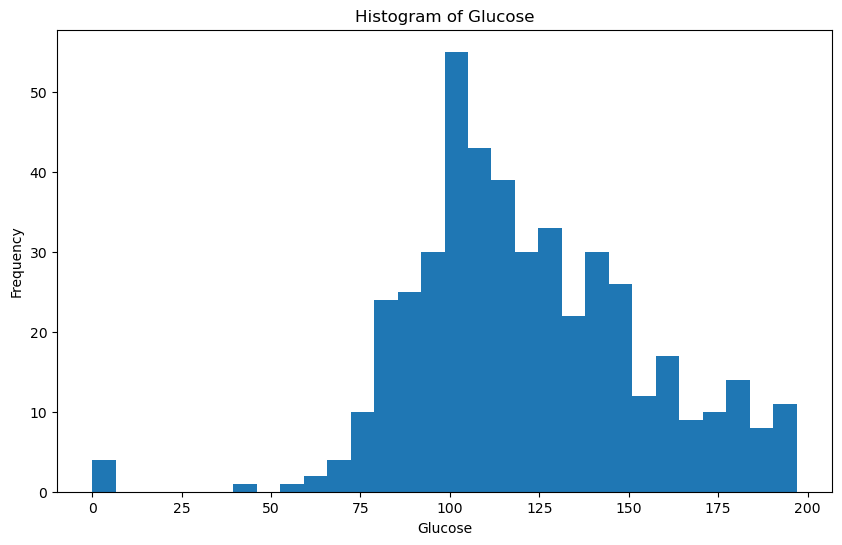

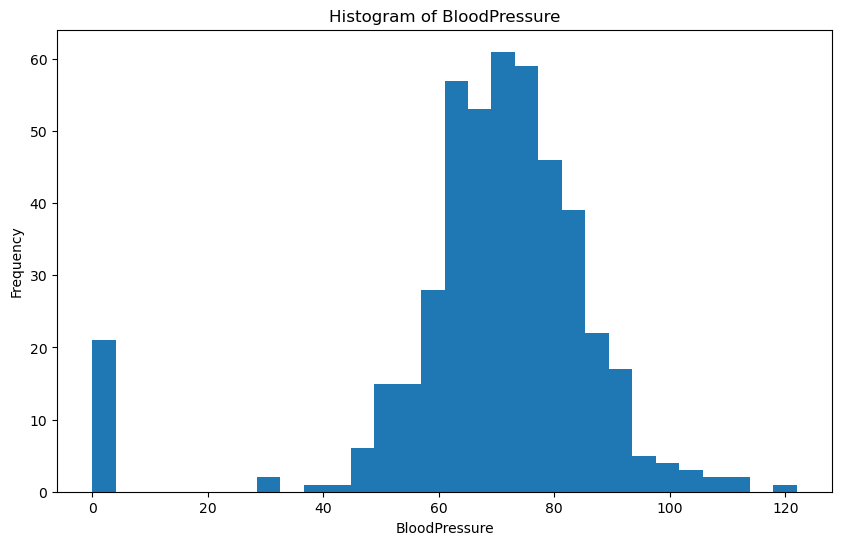

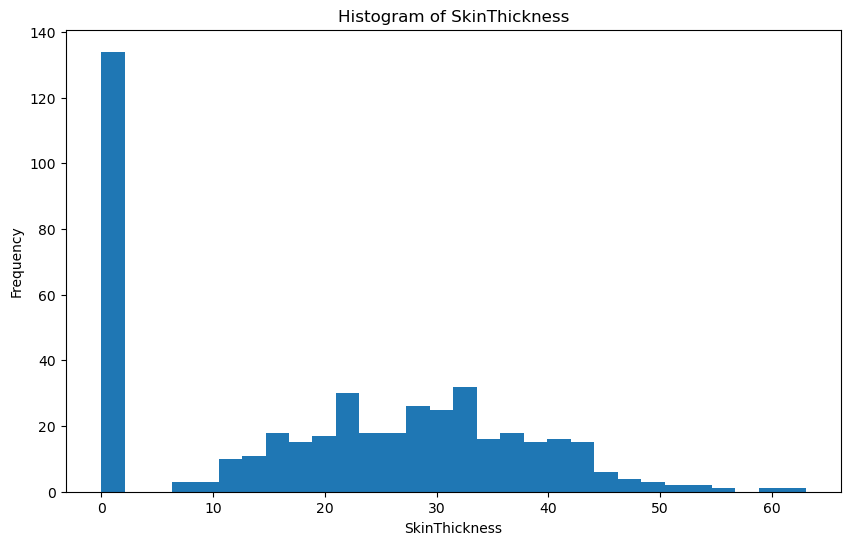

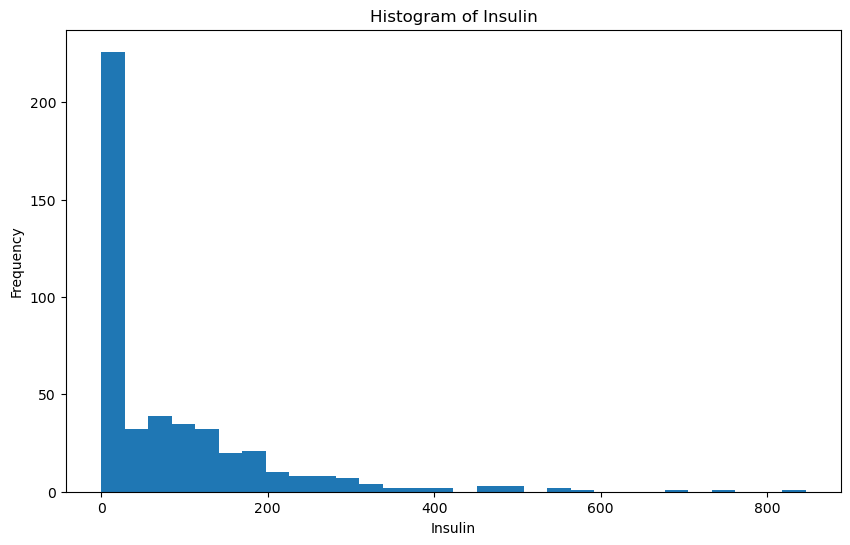

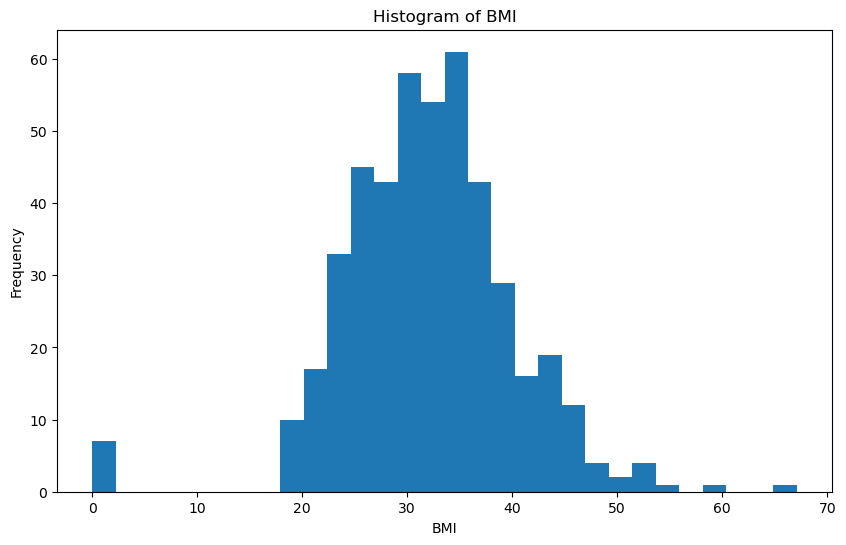

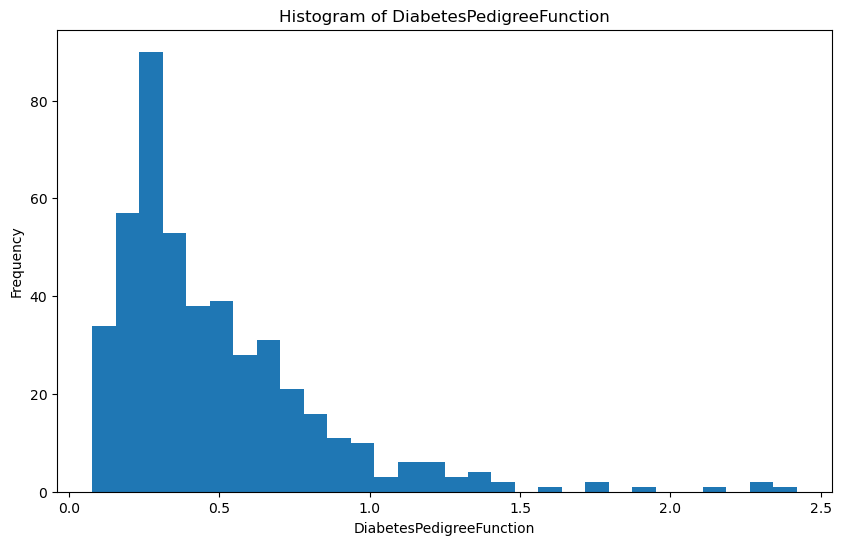

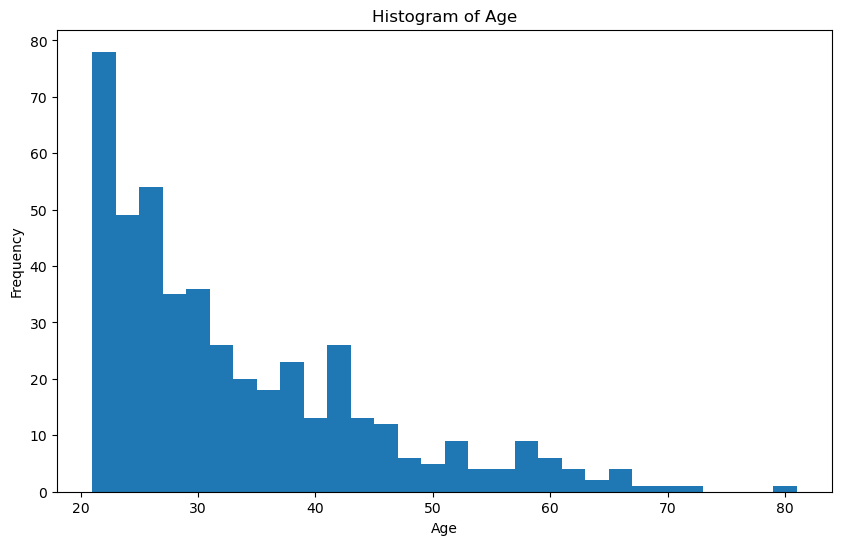

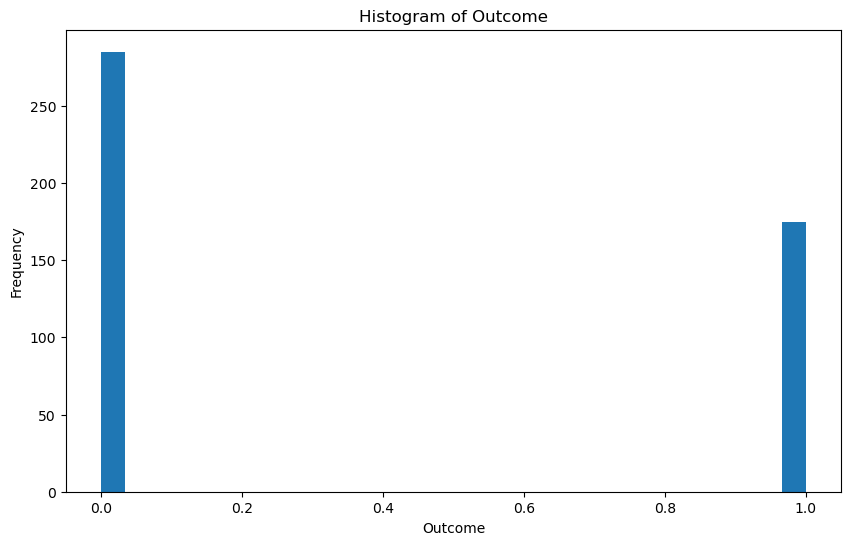

In [16]:
for column in training_df.columns:
    plt.figure(figsize=(10, 6))
    training_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

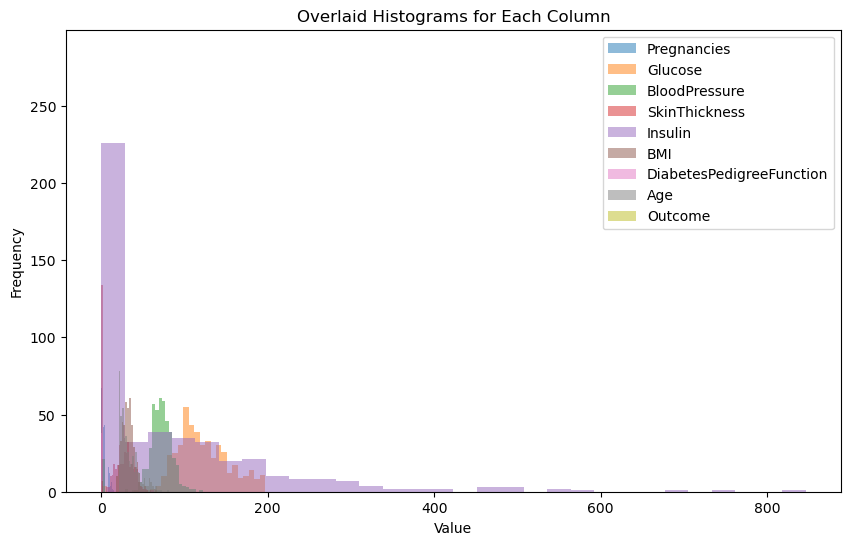

In [17]:
plt.figure(figsize=(10, 6))
for column in training_df.columns:
    plt.hist(training_df[column], bins=30, alpha=0.5, label=str(column))
plt.legend()
plt.title('Overlaid Histograms for Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

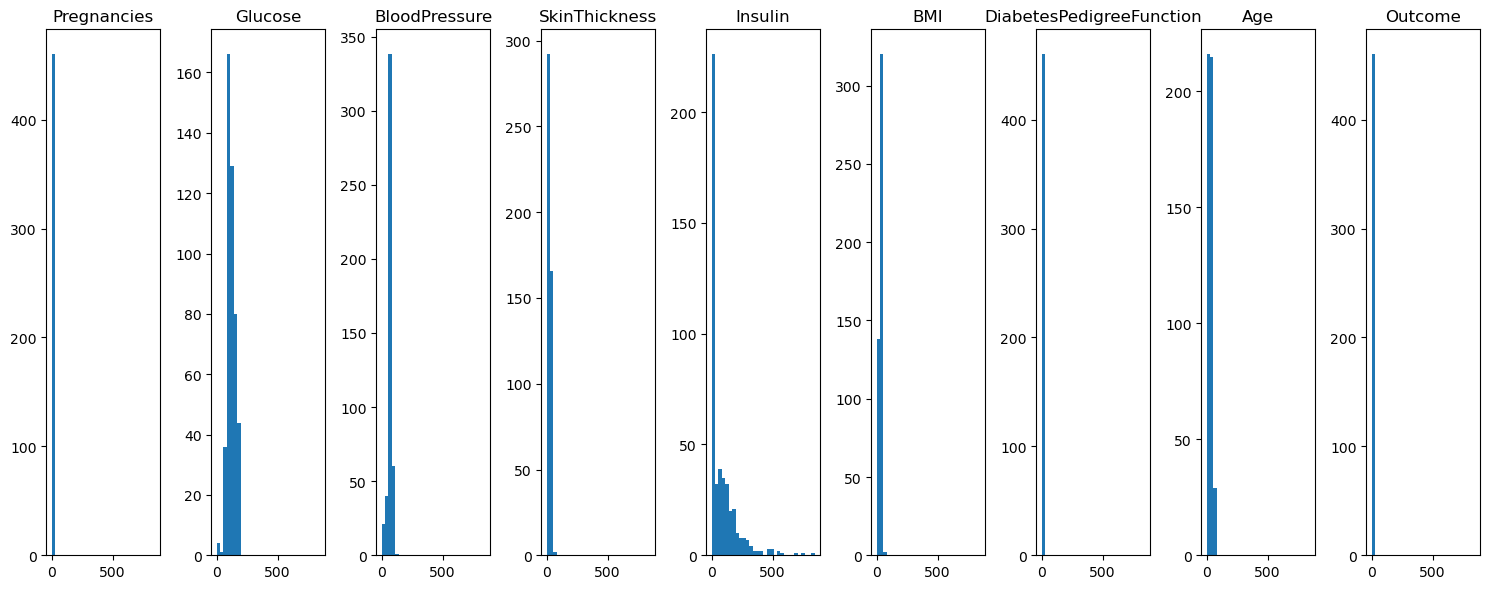

In [19]:
plt.figure(figsize=(15, 6))

# Number of bins
bins = 30

# Max and min values for consistent bin size
max_bin = training_df.max().max()
min_bin = training_df.min().min()

for i, column in enumerate(training_df.columns):
    plt.subplot(1, len(training_df.columns), i+1)
    plt.hist(training_df[column], bins=bins, range=(min_bin, max_bin))
    plt.title(column)

plt.tight_layout()
plt.show()

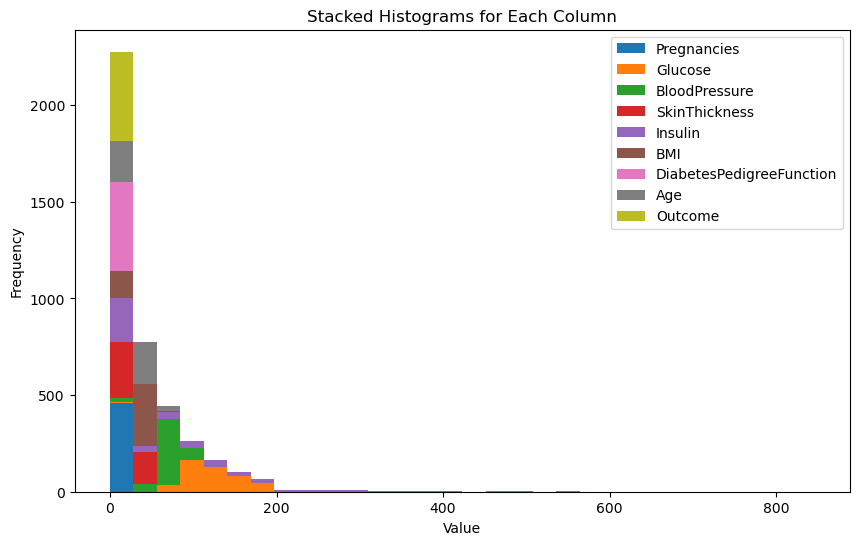

In [20]:
plt.figure(figsize=(10, 6))

# Creating a list of data for each column
data = [training_df[column] for column in training_df.columns]

plt.hist(data, bins=30, stacked=True)
plt.title('Stacked Histograms for Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(training_df.columns)
plt.show()

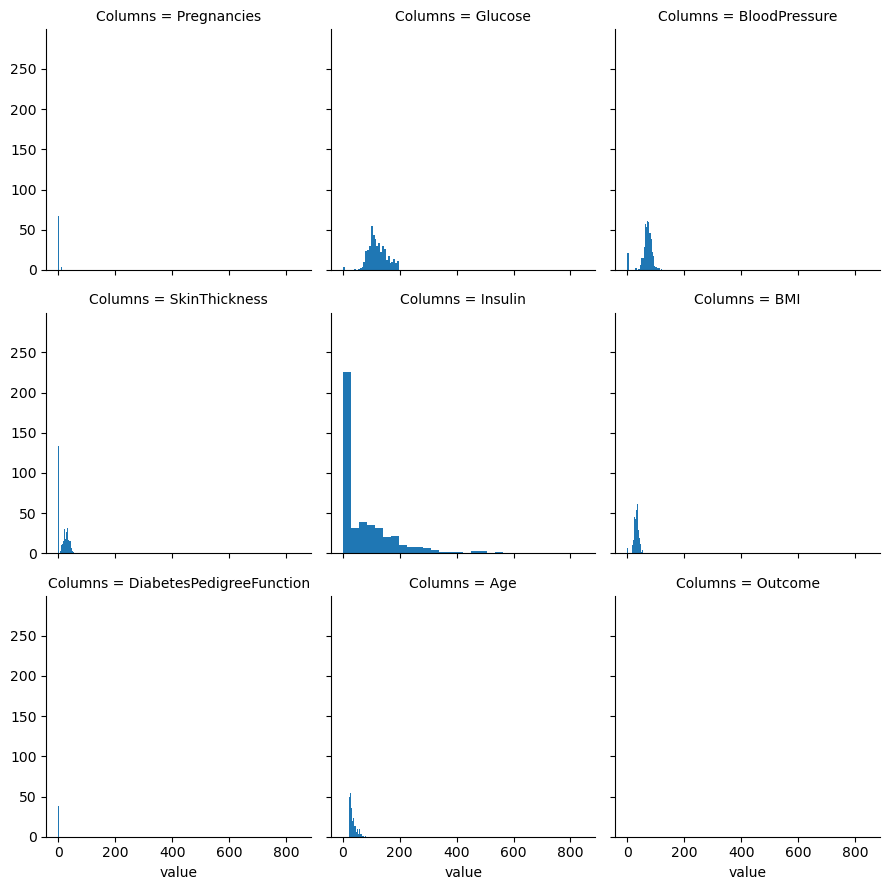

In [21]:
import seaborn as sns

# Facet grid
g = sns.FacetGrid(pd.melt(training_df, var_name='Columns'), col='Columns', sharex=True, col_wrap=3)
g.map(plt.hist, 'value', bins=30)

plt.show()

In [25]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        78
           1       0.85      0.55      0.67        60

    accuracy                           0.76       138
   macro avg       0.79      0.74      0.74       138
weighted avg       0.78      0.76      0.75       138

The Accuracy: 0.7608695652173914


In [26]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

logistic_regression_analysis(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.85      0.78        78
           1       0.74      0.58      0.65        60

    accuracy                           0.73       138
   macro avg       0.73      0.71      0.72       138
weighted avg       0.73      0.73      0.73       138

The Accuracy: 0.7318840579710145


In [35]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

min_max_scaler =  MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaler.fit_transform(X_train), min_max_scaler.fit_transform(X_test)

support_vector_machine(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test)

SVM Accuracy: 0.7318840579710145


In [36]:
X, y = training_df.drop("Outcome",axis =1), training_df["Outcome"]

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train_standard_scaled, X_test_standard_scaled = standard_scaler.fit_transform(X_train), standard_scaler.fit_transform(X_test)

support_vector_machine(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

SVM Accuracy: 0.7246376811594203
